<a href="https://colab.research.google.com/github/preetishinge/Customer-segmentation-project/blob/main/Android_malware_detection_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")

<ipython-input-74-863d29886330>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")


In [ ]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [ ]:
data.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
count,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,...,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000
mean,0.426443,0.446595,0.442671,0.413208,0.444932,0.486898,0.236632,0.330806,0.282389,0.312583,...,0.007050,0.233307,0.017425,0.004256,0.434424,0.666135,0.290835,0.016028,0.007050,0.044959
std,0.494576,0.497156,0.496719,0.492426,0.496975,0.499845,0.425029,0.470519,0.450177,0.463561,...,0.083669,0.422950,0.130852,0.065105,0.495698,0.471608,0.454163,0.125588,0.083669,0.207220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


In [ ]:
object_columns = data.select_dtypes(include='object')
object_columns.head()

,TelephonyManager.getSimCountryIso,class
0,0,S
1,0,S
2,0,S
3,0,S
4,0,S


In [ ]:
data['class'].unique()

array(['S', 'B'], dtype=object)

In [ ]:
# Perform Label Encoding
lbl_enc = LabelEncoder()
# lbl_enc.fit(data['class'])
# lbl_enc.transform(data['class'])
data['class'] = lbl_enc.fit_transform(data['class'])

In [ ]:
data=data.replace('[?]',np.NaN,regex=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(215), object(1)
memory usage: 24.8+ MB


In [ ]:
data['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', nan, 1, 0], dtype=object)

In [ ]:
data['TelephonyManager.getSimCountryIso'] = pd.to_numeric(data['TelephonyManager.getSimCountryIso'])

In [ ]:
print("Total missing values : ",sum(list(data.isnull().sum())))

Total missing values :  5


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: float64(1), int64(215)
memory usage: 24.9 MB


In [ ]:
print("Total Features: ", len(data.columns) - 1)

Total Features:  215


In [ ]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
classes,class_count = np.unique(data['class'], return_counts=True)

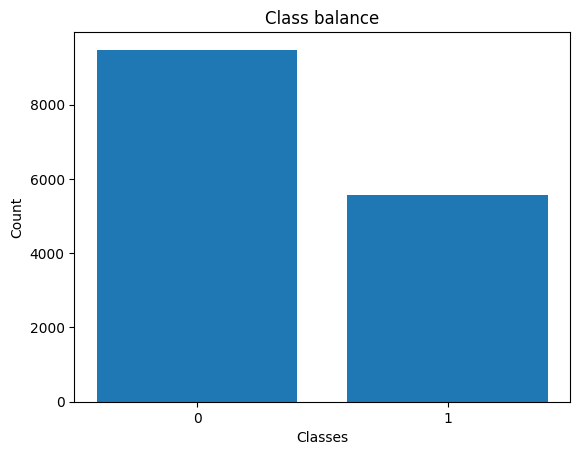

In [ ]:
# Class balance plot
classes,class_count = np.unique(data['class'], return_counts=True)
plt.bar(classes,class_count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks([0,1])
plt.show()

In [ ]:
data.corrwith(data['class'])

transact                     -0.570093
onServiceConnected           -0.561036
bindService                  -0.558808
attachInterface              -0.551434
ServiceConnection            -0.557568
                                ...   
ACCESS_FINE_LOCATION          0.017259
SET_WALLPAPER_HINTS          -0.015435
SET_PREFERRED_APPLICATIONS    0.011243
WRITE_SECURE_SETTINGS        -0.005872
class                         1.000000
Length: 216, dtype: float64

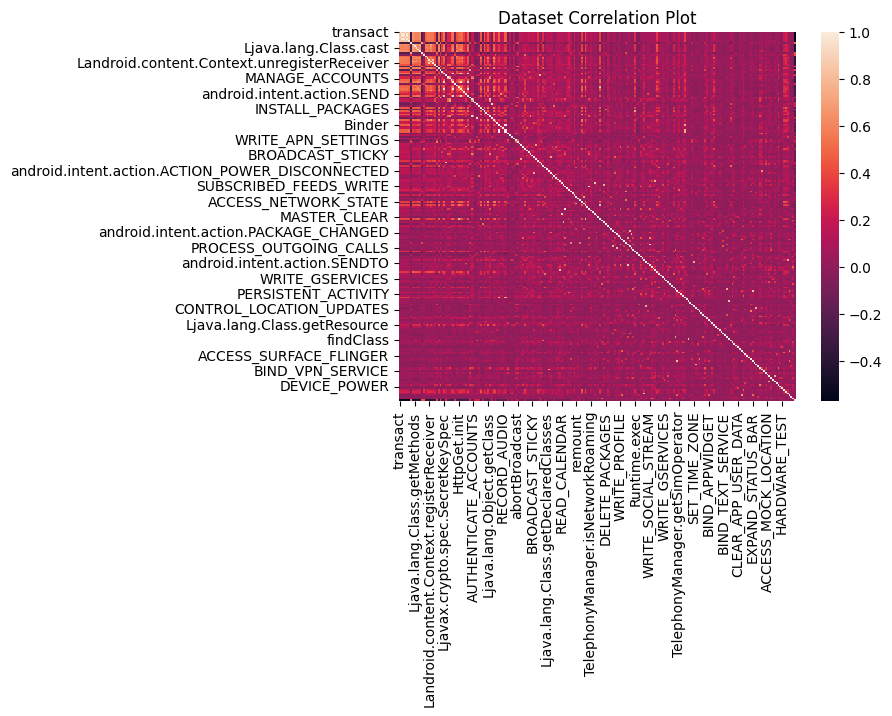

In [ ]:
# Dataset heatmap
sns.heatmap(data.corr())
plt.title('Dataset Correlation Plot')
plt.show()

In [ ]:
X=data.drop('class',axis=1)
Y=data['class']

In [ ]:
X.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(15031, 102)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, shuffle=True)

In [ ]:
def train_evaluate_classifier(classifier, train_data, test_data, train_labels, test_labels):
    classifier.fit(train_data, train_labels)
    predictions = classifier.predict(test_data)
    probabilities = classifier.predict_proba(test_data)[:, 1]

    accuracy = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions)
    cm = confusion_matrix(test_labels, predictions)

    return predictions, probabilities, accuracy, report, cm



# SVM

In [ ]:
# =============================== Classification ===================================
print('Support Vector Machine')
svm_classifier = SVC(kernel='linear', probability=True)

Support Vector Machine


In [ ]:
svm_pred, svm_prob, svm_accuracy, svm_report, svm_cm = train_evaluate_classifier(svm_classifier,X_train, X_test, y_train, y_test)

In [ ]:
print(svm_pred[:10])
print(svm_prob)

[0 0 0 0 0 0 0 1 0 0]
[3.67402784e-01 1.52224411e-01 1.44471007e-07 ... 1.72815297e-01
 1.00000010e-07 8.52707202e-05]


In [ ]:
# Metrics and plots
print(f"SVM accuracy is: {svm_accuracy*100:.2f}%")

SVM accuracy is: 97.14%


In [ ]:
print('SVM Classification Report')
print(svm_report)
print(svm_cm)

SVM Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1886
           1       0.97      0.96      0.96      1121

    accuracy                           0.97      3007
   macro avg       0.97      0.97      0.97      3007
weighted avg       0.97      0.97      0.97      3007

[[1849   37]
 [  49 1072]]


In [ ]:
svm_classifier.predict([X_test[3]])

array([0])

**sensitivity** : sensitivity is the ratio of true positive predictions to the total number of
actual positive cases. It is also know as TPR (True positive ratio)

It tells us how many of the actual positive cases the model is able to identify.

**Specificity** : Specificity is the ratio of true negative predictions to the total number of
actual negative cases.
It tells us how many of the actual nagative cases the model is able to identify.

FPR = 1 - Specificity

In [ ]:
svm_cm

array([[1849,   37],
       [  49, 1072]])

In [ ]:
# Specificity and Sensitivity calculation
svm_tn, svm_fp, svm_fn, svm_tp = svm_cm.ravel()
specificity = svm_tn / (svm_tn + svm_fp)
sensitivity = svm_tp / (svm_fn + svm_tp)
print('SVM Specificity:', format(specificity, '.3f'))
print('SVM Sensitivity:', format(sensitivity, '.3f'))

SVM Specificity: 0.980
SVM Sensitivity: 0.956


## ROC (Receiver Operating Characteristic)
**Definition**: The ROC curve is a graphical representation of the trade-off between sensitivity and specificity at various threshold settings for a binary classification system.

**Construction**: The curve is created by plotting the true positive rate (sensitivity,TPR) against the false positive rate *(1-specificity , FPR)* at various threshold values.

**Interpretation**: The closer the ROC curve is to the upper-left corner of the plot, the better the overall performance of the classification model.
(High AUC is better)

In [ ]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)

In [ ]:
# ROC curve and AUC
svm_roc_auc = auc(svm_fpr, svm_tpr) * 100
print('SVM ROC Accuracy is:', svm_roc_auc, '%')

SVM ROC Accuracy is: 99.38601063472528 %


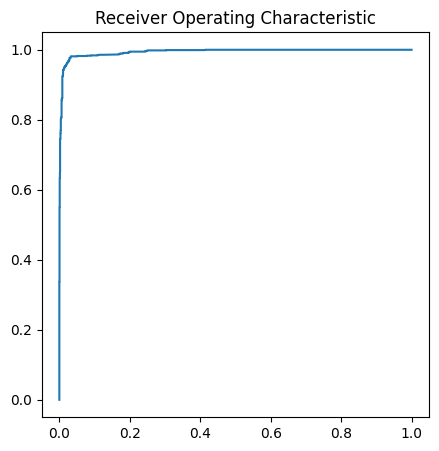

In [ ]:
plt.figure(figsize=(5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(svm_fpr, svm_tpr, label=f'AUC = {svm_roc_auc:.2f}')

# MLP

In [ ]:
mlp_classifire = MLPClassifier(random_state=1, max_iter=300)
mlp_pred, mlp_prob, mlp_accuracy, mlp_report, mlp_cm = train_evaluate_classifier(
    mlp_classifire, X_train, X_test, y_train, y_test
)

In [ ]:
print(mlp_pred)
print(mlp_prob)

[0 0 0 ... 0 0 0]
[2.26612213e-03 4.86657297e-04 7.45947946e-12 ... 4.98871599e-04
 2.54880809e-12 4.28699396e-12]


In [ ]:
print(f"MLP accuracy is: {mlp_accuracy*100:.2f}%")

MLP accuracy is: 98.40%


In [ ]:
print('MLP Classification Report')
print(mlp_report)
print(mlp_cm)

MLP Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.98      0.98      0.98      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007

[[1863   23]
 [  25 1096]]


In [ ]:
# ROC curve and AUC
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr) * 100
print('SVM ROC Accuracy is:', mlp_roc_auc, '%')

SVM ROC Accuracy is: 99.78717778683819 %


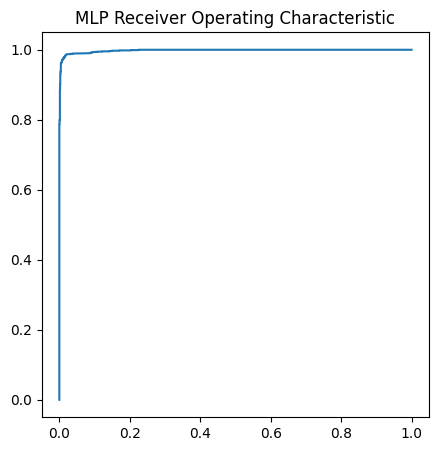

In [ ]:
plt.figure(figsize=(5, 5))
plt.title('MLP Receiver Operating Characteristic')
plt.plot(mlp_fpr, mlp_tpr, label=f'AUC = {mlp_roc_auc:.2f}')